In [1]:
import torch
import matplotlib.pyplot as plt

In [12]:
X_raw=torch.load("assign0_data.py")
m=torch.mean(X_raw,1,keepdim=True)

X

 2.0481 -2.4186
 2.3295 -2.3656
 2.1563 -2.2842
       ⋮        
 2.1631 -2.3214
 2.2425 -2.0835
 2.3117 -2.2227
[torch.FloatTensor of size 629x2]

mean(X_raw)

-0.1852
-0.0181
-0.0639
-0.1016
-0.1615
-0.0640
-0.0704
-0.0669
 0.0067
-0.0173
-0.1489
 0.0137
-0.0275
-0.0188
-0.1144
-0.1129
-0.0426
-0.1487
-0.0832
-0.0877
-0.1059
-0.1774
 0.0094
-0.2533
-0.1504
-0.2116
-0.1649
-0.0543
-0.1925
-0.1223
-0.2066
-0.2307
-0.1165
-0.0821
-0.1557
-0.2779
-0.1129
-0.2057
-0.1086
-0.2009
-0.1757
 0.0101
-0.1491
-0.2381
-0.2273
-0.2104
-0.1709
-0.1738
-0.1400
-0.1779
-0.0987
-0.3035
-0.1250
-0.1283
-0.1225
-0.1827
-0.0946
-0.1739
-0.1605
-0.1493
-0.2463
-0.1924
-0.1233
-0.1527
-0.0575
-0.0820
-0.1644
-0.0609
-0.1520
-0.0999
-0.1736
-0.1841
 0.0823
-0.0563
-0.1743
-0.1594
-0.1321
 0.0085
-0.1147
-0.0475
-0.0282
-0.2050
-0.1699
-0.1630
-0.1448
-0.0814
 0.0198
-0.1666
 0.0398
 0.0909
-0.1391
-0.1081
-0.0407
-0.0822
-0.0283
 0.0146
 0.0233
 0.1426
 0.0097
-0.0008
 0.0148
 0.0127
 0.0591
 0.0670
-0.0

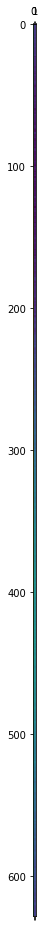

In [13]:
print("X")
print(X_raw)
print("mean(X_raw)")
print(m)
plt.matshow(X_raw.numpy())
plt.show()

In [4]:
mean2d=m

In [5]:
for i in range(X_raw.size()[1] -1):
    mean2d=torch.cat((mean2d,m),1)
print(mean2d)


-0.1852 -0.1852
-0.0181 -0.0181
-0.0639 -0.0639
       ⋮        
-0.0791 -0.0791
 0.0795  0.0795
 0.0445  0.0445
[torch.FloatTensor of size 629x2]



In [6]:
X=X_raw-mean2d


 2.2333 -2.2333
 2.3476 -2.3476
 2.2202 -2.2202
       ⋮        
 2.2423 -2.2423
 2.1630 -2.1630
 2.2672 -2.2672
[torch.FloatTensor of size 629x2]



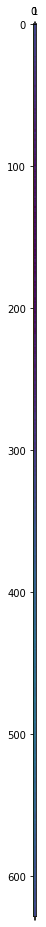

In [7]:
print(X)
plt.matshow(X.numpy())
plt.show()

In [8]:

def covariance(X):
    X_t=torch.transpose(X,0,1)
    #print(X_t)
    covx=torch.mm(X_t,X)/X.size()[0]
    #print(covx)
    return covx
covx=covariance(X)

In [9]:
(lambda_e,e)=torch.eig(covx,eigenvectors=True)
e_m1=torch.inverse(e)
lambda_e=lambda_e[:,0]
d=torch.diag(lambda_e)
wd=torch.transpose(e,0,1)
d_m1div2=torch.pow(torch.inverse(d),0.5)
d_m1div2[d_m1div2 != d_m1div2] = 0 
print(d_m1div2)
ww=torch.mm(d_m1div2,wd)


 0.0000  0.0000
 0.0000  0.2806
[torch.FloatTensor of size 2x2]




 0.2500 -0.2500
-0.2500  0.2500
[torch.FloatTensor of size 2x2]



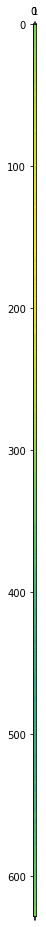

In [11]:
Y=torch.mm(X,ww)
covy=covariance(Y)
print(covy)
plt.matshow(Y.numpy())
plt.show()